#  Bike Sharing Dataset Data Set 

## Analiza zbioru

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
import statistics
from sklearn.impute import KNNImputer

data = pd.read_csv('./data.csv', delimiter=',')
data.head()

,yr,season,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,1,0,0,6,1,3.28,3,-1,0,3,13,16
1,0,1,1,1,0,6,1,2.34,2,80,0,8,32,40
2,0,1,1,2,0,6,1,2.34,2,80,0,5,27,32
3,0,1,1,3,0,6,1,3.28,3,75,0,3,10,13
4,0,1,1,4,0,6,1,3.28,3,-1,0,0,1,1


In [2]:
data.describe()

,yr,season,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.502561,2.501640,6.537775,11.546752,0.028770,3.003683,1.425283,15.358397,15.401116,53.277922,12.736233,35.676218,153.786869,189.463088
std,0.500008,1.106918,3.438776,6.914405,0.167165,2.005771,0.639357,9.050138,11.341858,28.760635,8.196891,49.305030,151.357286,181.387599
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-7.060000,-16.000000,-1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,4.000000,6.000000,0.000000,1.000000,1.000000,7.980000,6.000000,39.000000,7.000000,4.000000,34.000000,40.000000
50%,1.000000,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,15.500000,16.000000,57.000000,13.000000,17.000000,115.000000,142.000000
75%,1.000000,3.000000,10.000000,18.000000,0.000000,5.000000,2.000000,23.020000,25.000000,76.000000,17.000000,48.000000,220.000000,281.000000
max,1.000000,4.000000,12.000000,23.000000,1.000000,6.000000,4.000000,39.000000,50.000000,100.000000,57.000000,367.000000,886.000000,977.000000


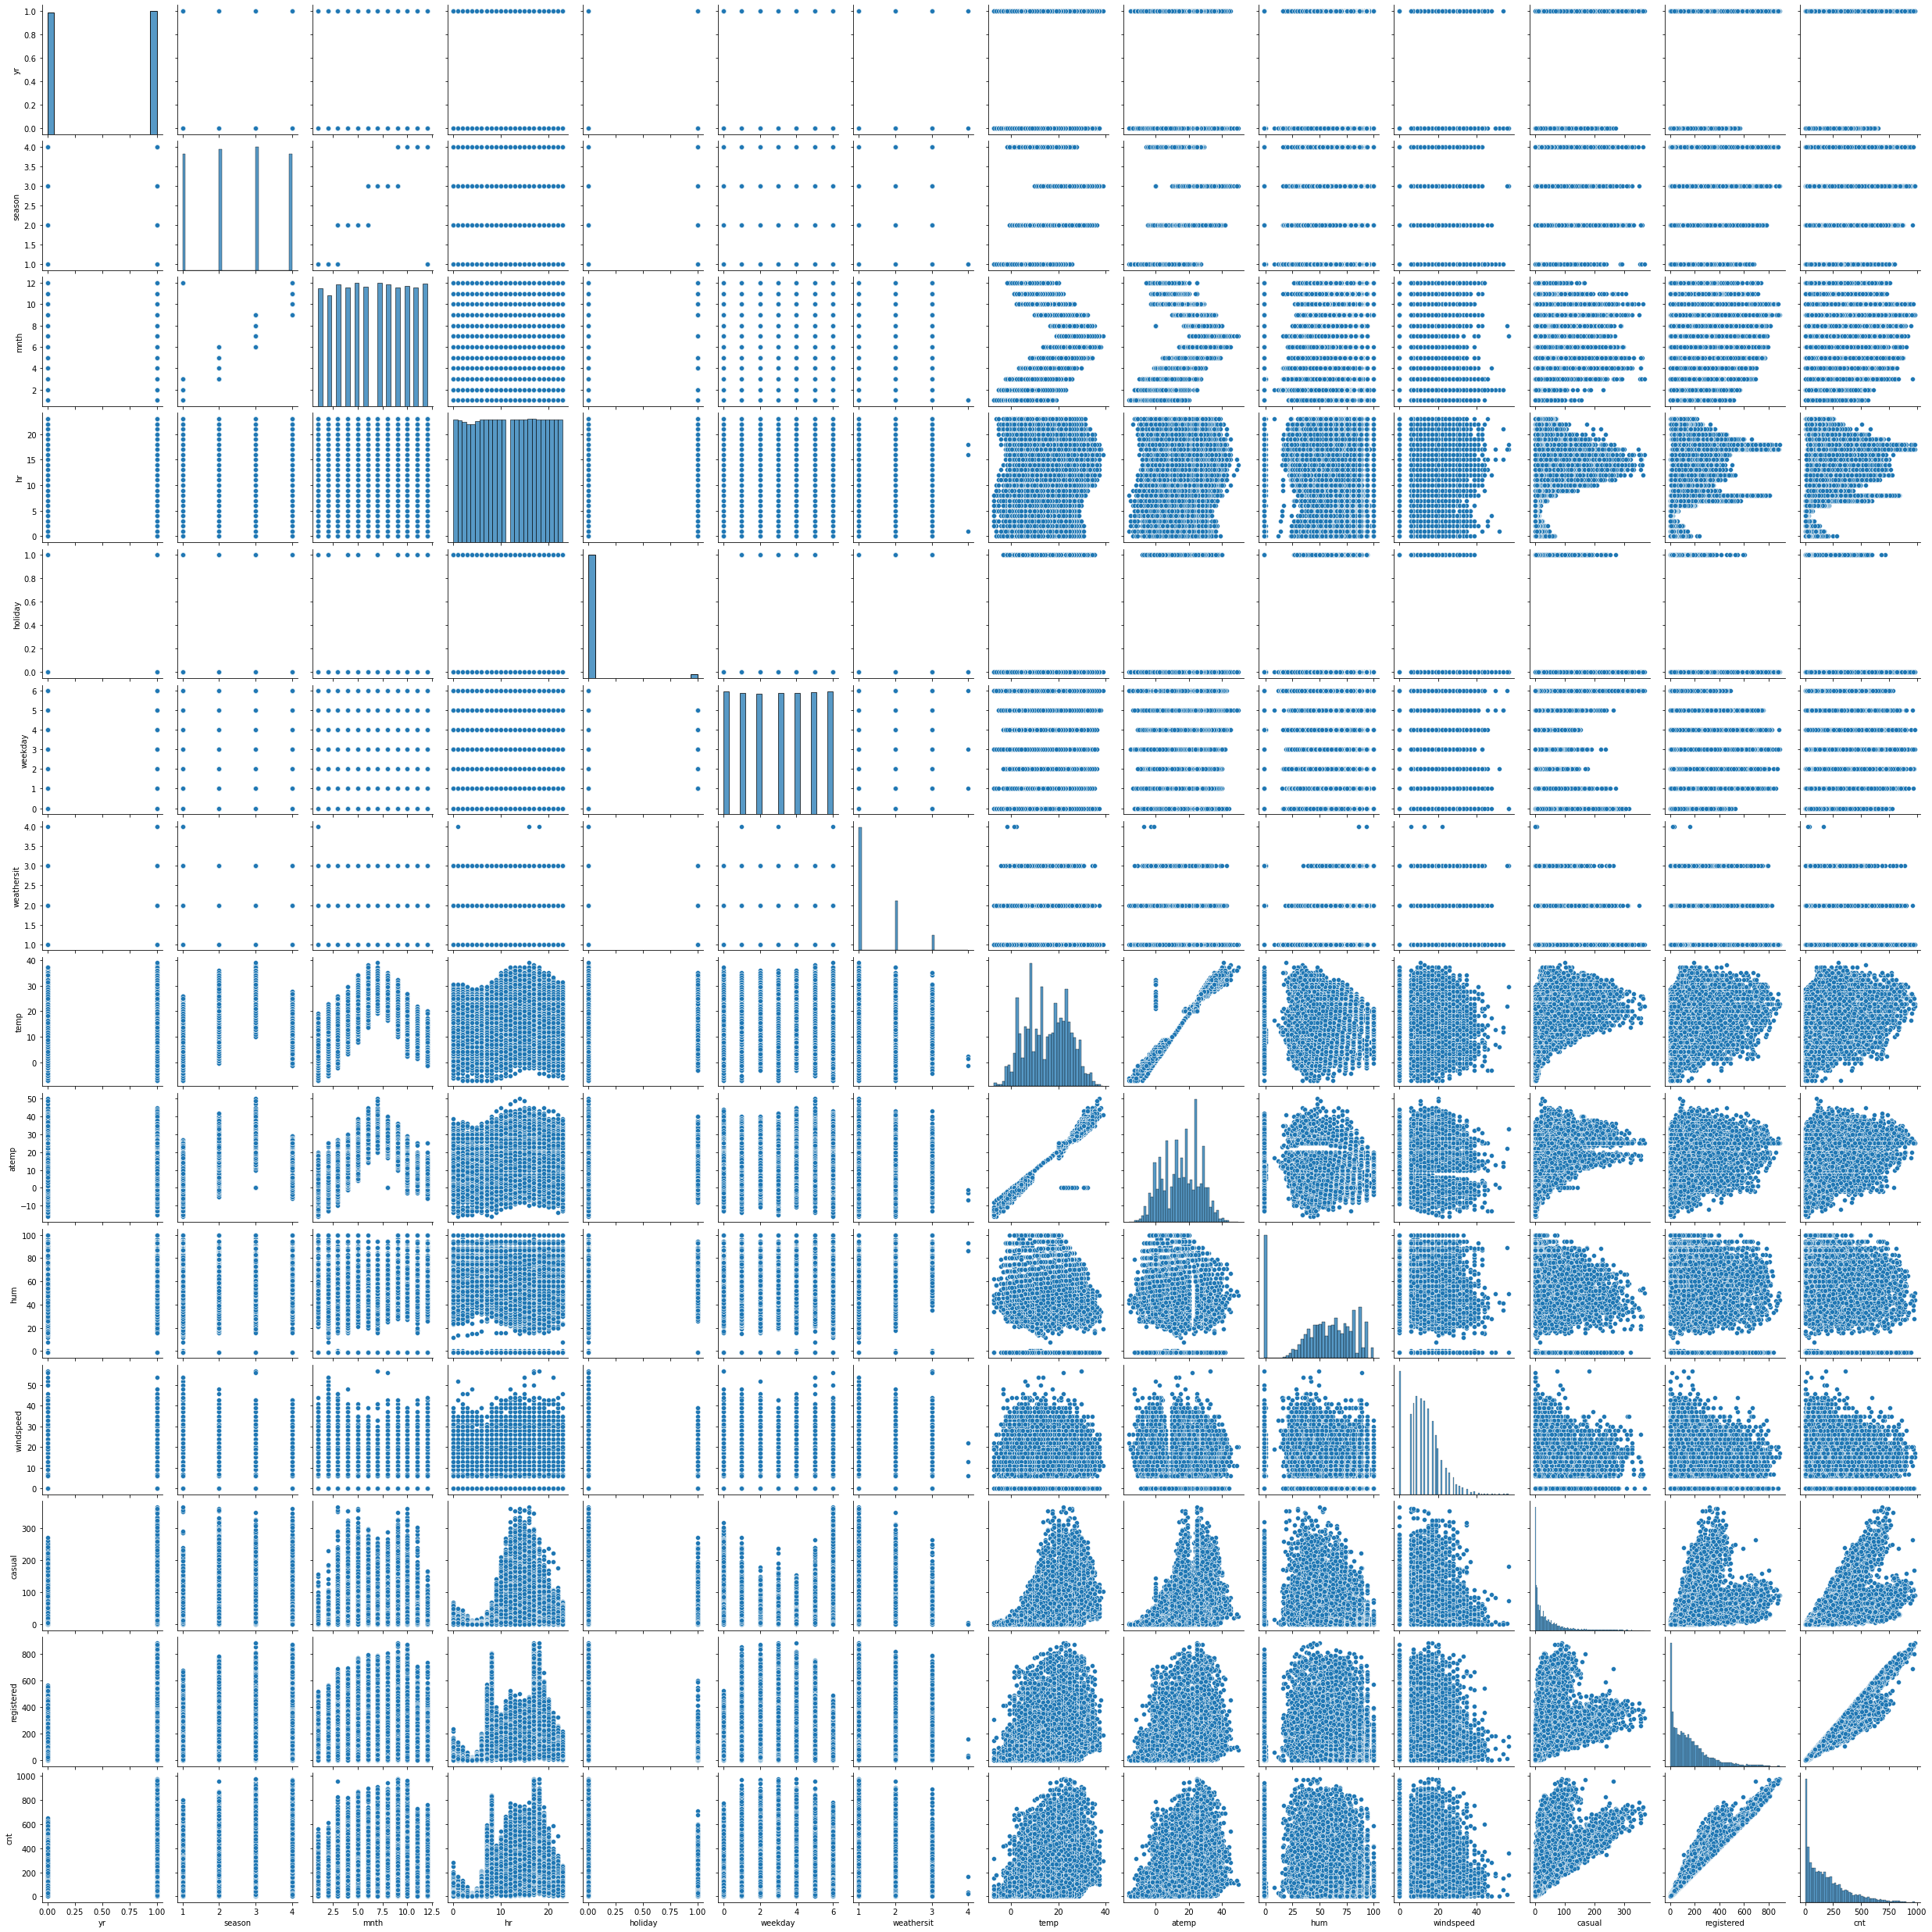

In [3]:
import seaborn as sns

sns.pairplot(data)

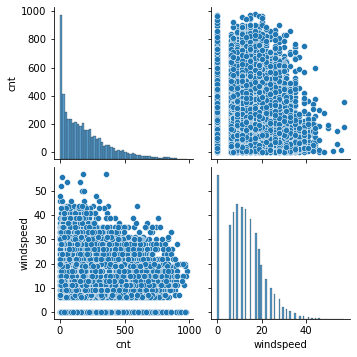

In [4]:
data_prep = data[data['cnt'] > -1] 
data_prep = data_prep[data_prep['windspeed'] > -1]

sns.pairplot(data_prep[['cnt', 'windspeed']])

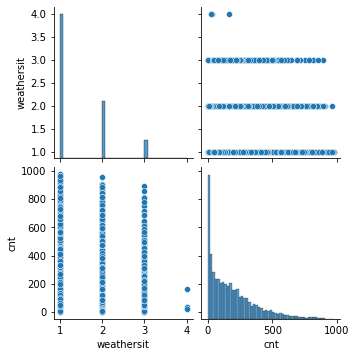

In [5]:
data_prep = data[data['cnt']>0]
data_prep = data_prep[data_prep['weathersit'] > 0]

sns.pairplot(data_prep[['weathersit', 'cnt']])

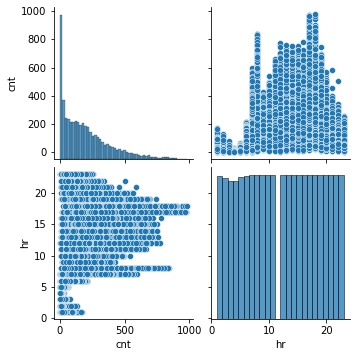

In [6]:
data_prep = data[data['cnt']>0]
data_prep = data_prep[data_prep['hr'] > 0]

sns.pairplot(data_prep[['cnt', 'hr']])

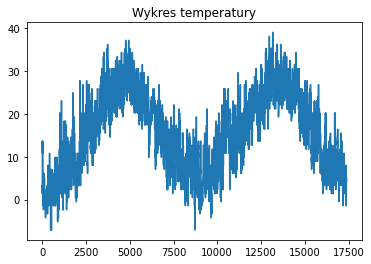

/home/rgegotek/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


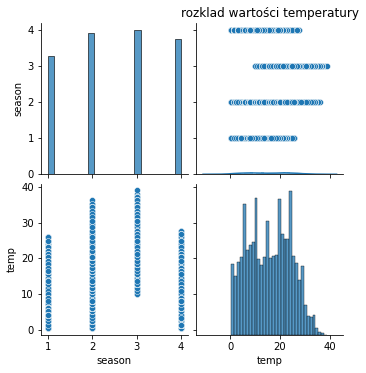

In [7]:
plt.plot(data['temp'])
plt.title("Wykres temperatury")
plt.show()

data_prep = data[data['season']>0]
data_prep = data_prep[data_prep['temp'] > 0]

sns.pairplot(data_prep[['season', 'temp']])

sns.distplot(data["temp"])
plt.title("rozklad wartości temperatury")
plt.show()

Powyżej widzimy zależność temperatury od pory roku

/home/rgegotek/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


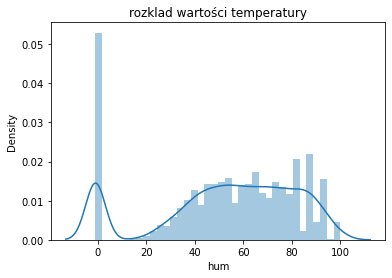

In [8]:
sns.distplot(data["hum"])
plt.title("rozklad wartości temperatury")
plt.show()

Na histogramie wyżej pokazano dane dotyczące wilgotnosci powietrza, na których widać wartości odstające, w tym przypadku oznaczone jako wartość -1

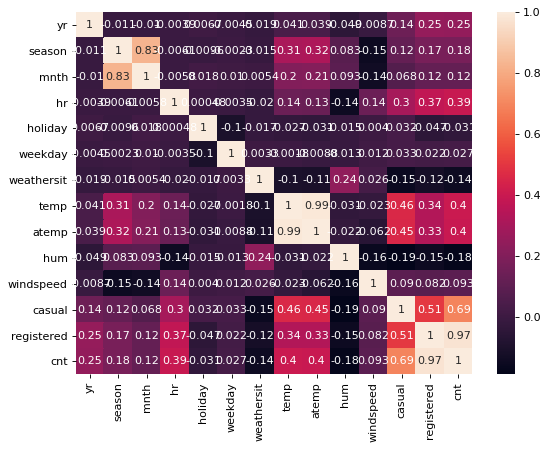

In [9]:
figure(figsize=(8, 6), dpi=80)

corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [10]:
np.sum(data.isna())

yr            0
season        0
mnth          0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Index(['yr', 'season', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')


array([[<AxesSubplot:title={'center':'yr'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'mnth'}>,
        <AxesSubplot:title={'center':'hr'}>],
       [<AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'weathersit'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'cnt'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

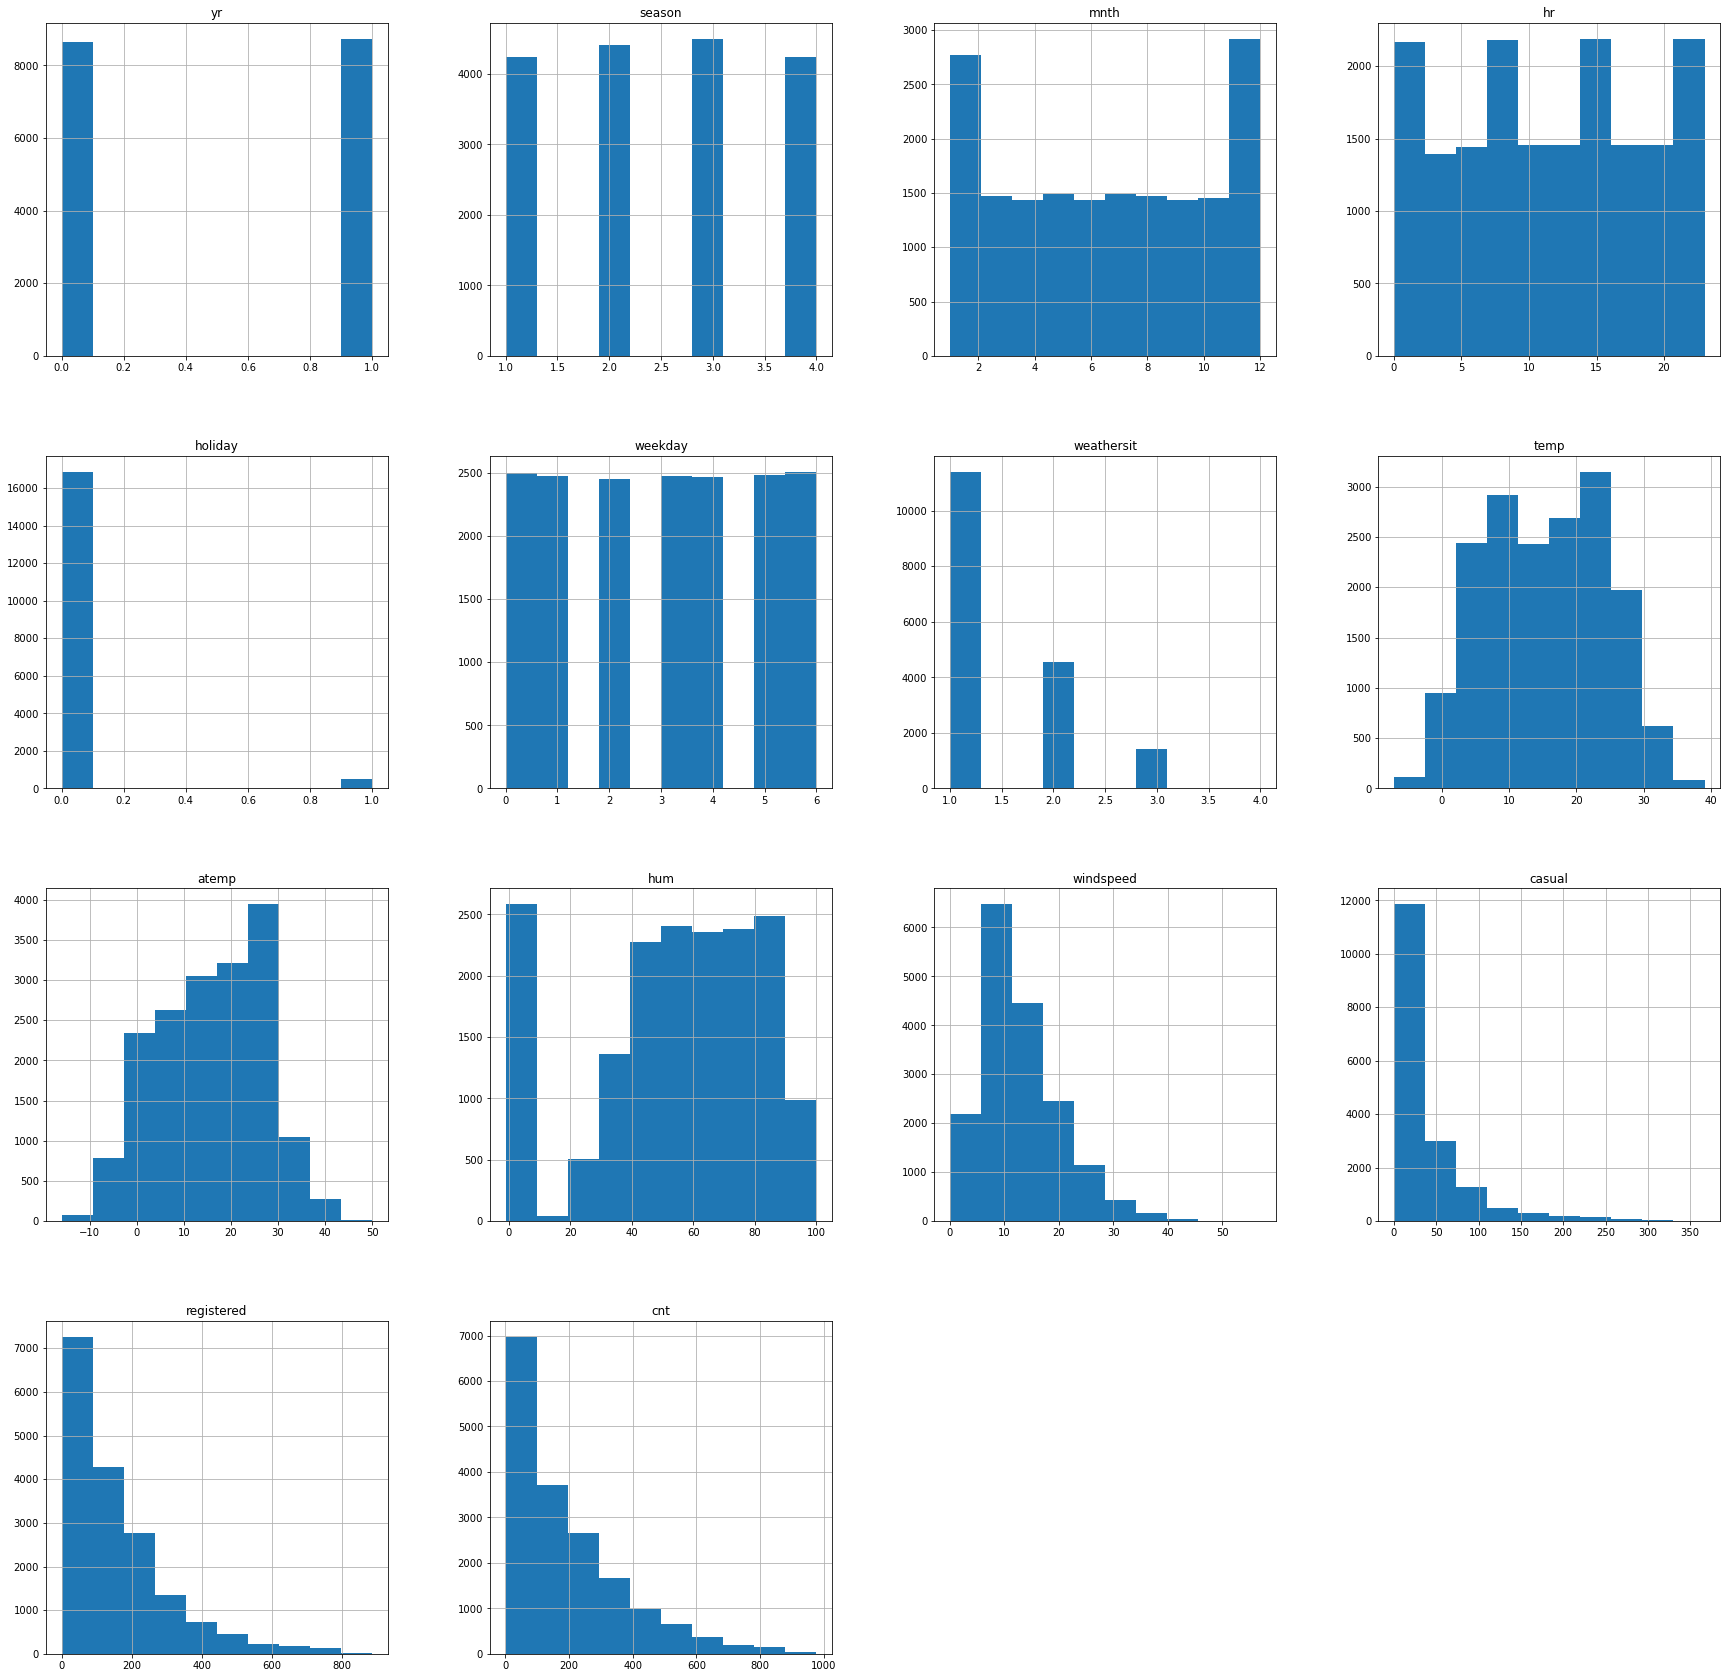

In [11]:
print(data.columns)

data.hist(figsize=(30, 30))

<AxesSubplot:>

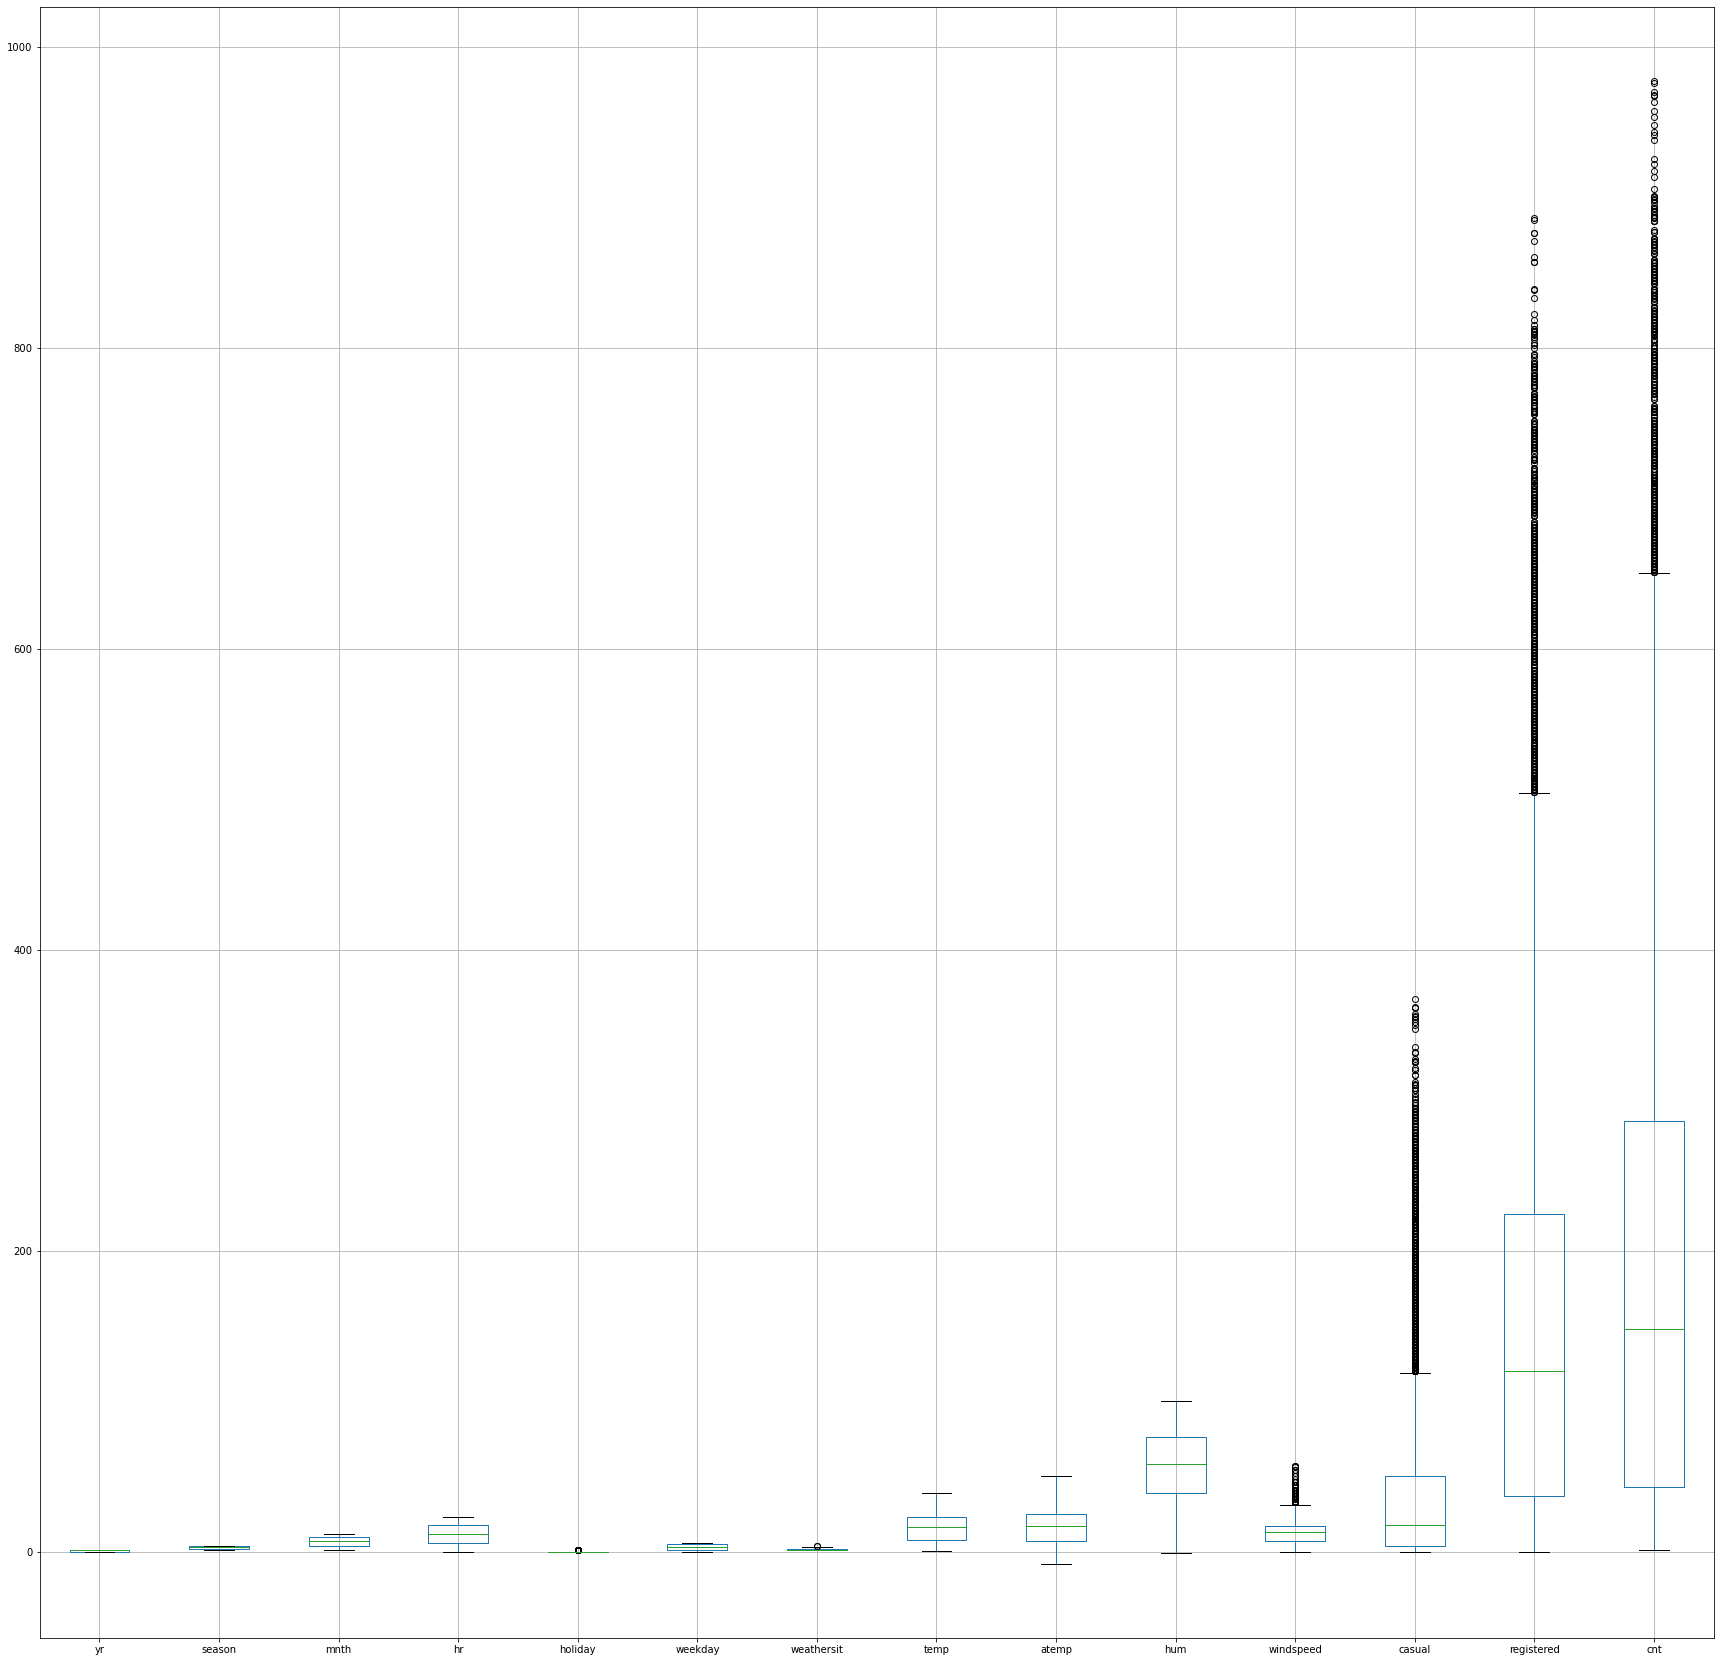

In [12]:
data_prep.boxplot(figsize=(30, 30))

## Wizualizacja danych

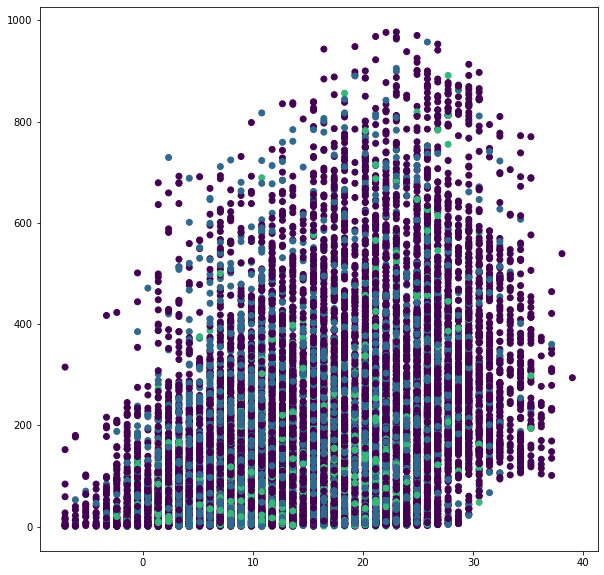

In [16]:
figure(figsize=(10,10))
data_v = data[data['weathersit'] > -1]
CNT = data['cnt']
TEMP = data['temp']

plt.scatter(TEMP, CNT, c=data_v['weathersit'])

Widzimy zależnosć ilości wypożyczeń od temperatury i panujących wtedy warunków atmosferycznych

# PART 2 - Korekcja danych odstających

Będziemy korygować parametr dotyczący wilgotności (hum) która nie może wynosić -1
Będziemy korzystać ze średniej z mediany i z algorytmu K-neighbours

/home/rgegotek/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


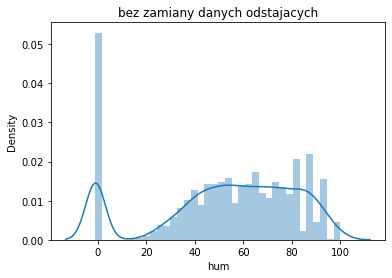

<ipython-input-17-f64bc9cdc217>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mediana["hum"][i] = median
/home/rgegotek/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


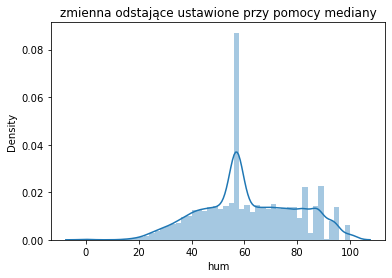

<ipython-input-17-f64bc9cdc217>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_srednia["hum"][i] = srednia
/home/rgegotek/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


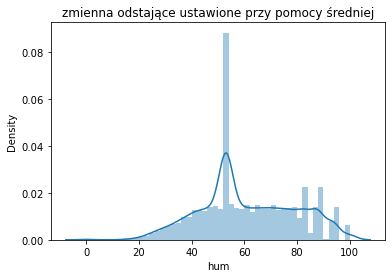

<ipython-input-17-f64bc9cdc217>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sasiedzi["hum"][i] = neighbours_sr
/home/rgegotek/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


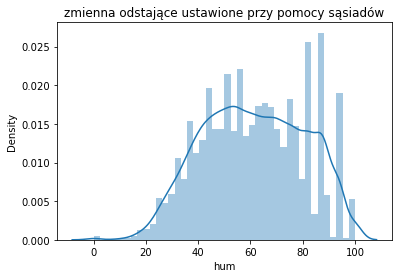

In [17]:
import statistics
from sklearn.impute import KNNImputer
sns.distplot(data["hum"])
plt.title("bez zamiany danych odstajacych")
plt.show()

data_mediana = data.copy()
median = statistics.median(data['hum'])
for i, element in enumerate(data_mediana["hum"]):
    if element == -1:
         data_mediana["hum"][i] = median
sns.distplot(data_mediana["hum"])
plt.title("zmienna odstające ustawione przy pomocy mediany")
plt.show()

data_srednia = data.copy()
srednia = statistics.mean(data['hum'])
for i, element in enumerate(data_srednia["hum"]):
    if element == -1:
         data_srednia["hum"][i] = srednia
sns.distplot(data_srednia["hum"])
plt.title("zmienna odstające ustawione przy pomocy średniej")
plt.show()

data_sasiedzi = data.copy()
num_neighbor = 3
for i, element in enumerate(data["hum"]):
    if element == -1:
        a = data["hum"]
        left = a[:i][-num_neighbor:]
        right= a[i+1:num_neighbor+i+1]
        neighbours = np.concatenate((left,right))
        neighbours_sr = statistics.mean(neighbours)
        data_sasiedzi["hum"][i] = neighbours_sr
sns.distplot(data_sasiedzi["hum"])
plt.title("zmienna odstające ustawione przy pomocy sąsiadów")
plt.show()


# Part 3 - skalowanie danych

Wizualiacja Skalowania typu MinMax dla parametru Wilgotnosći

SREDNIA:
 count    17379.000000
mean         0.612448
std          0.181394
min          0.000000
25%          0.500000
50%          0.570000
75%          0.760000
max          1.000000
Name: hum, dtype: float64


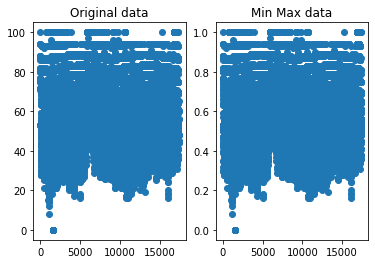

MEDIANA:
 count    17379.000000
mean         0.618349
std          0.179253
min          0.000000
25%          0.500000
50%          0.570000
75%          0.760000
max          1.000000
Name: hum, dtype: float64


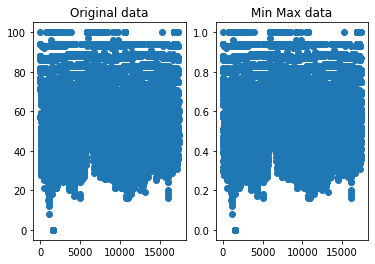

SASIEDZI:
 count    17379.000000
mean         0.612652
std          0.193748
min          0.000000
25%          0.460000
50%          0.610000
75%          0.770000
max          1.000000
Name: hum, dtype: float64


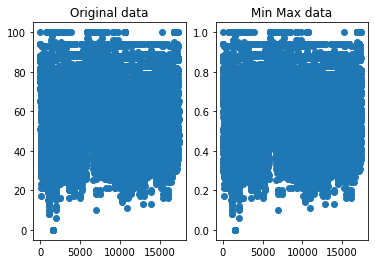

In [18]:
import matplotlib.pyplot as plt
scaler = preprocessing.MinMaxScaler()
scaler_2 = preprocessing.MinMaxScaler(feature_range = (-1, 1))
print("Wizualiacja Skalowania typu MinMax dla parametru Wilgotnosći\n")
data_srednia_min_max = data_srednia.copy()
data_srednia_min_max[['hum', 'windspeed']] = scaler.fit_transform(data_srednia_min_max[['hum', 'windspeed']])
data_srednia_min_max[['temp', 'atemp']] = scaler_2.fit_transform(data_srednia_min_max[['temp', 'atemp']])
fig, axes = plt.subplots(1,2)
axes[0].scatter(range(len(data_srednia["hum"])), data_srednia["hum"])
axes[0].set_title("Original data")
axes[1].scatter(range(len(data_srednia_min_max["hum"])), data_srednia_min_max["hum"])
axes[1].set_title("Min Max data")
print("SREDNIA:\n", data_srednia_min_max["hum"].describe())
plt.show()

data_mediana_min_max = data_mediana.copy()
data_mediana_min_max[['hum', 'windspeed']] = scaler.fit_transform(data_mediana_min_max[['hum', 'windspeed']])
data_mediana_min_max[['temp', 'atemp']] = scaler_2.fit_transform(data_mediana_min_max[['temp', 'atemp']])
fig, axes = plt.subplots(1,2)
axes[0].scatter(range(len(data_mediana["hum"])), data_mediana["hum"])
axes[0].set_title("Original data")
axes[1].scatter(range(len(data_mediana_min_max["hum"])), data_mediana_min_max["hum"])
axes[1].set_title("Min Max data")
print("MEDIANA:\n", data_mediana_min_max["hum"].describe())
plt.show()

data_sasiedzi_min_max = data_sasiedzi.copy()
data_sasiedzi_min_max[['hum', 'windspeed']] = scaler.fit_transform(data_sasiedzi_min_max[['hum', 'windspeed']])
data_sasiedzi_min_max[['temp', 'atemp']] = scaler_2.fit_transform(data_sasiedzi_min_max[['temp', 'atemp']])
fig, axes = plt.subplots(1,2)
axes[0].scatter(range(len(data_sasiedzi["hum"])), data_sasiedzi["hum"])
axes[0].set_title("Original data")
axes[1].scatter(range(len(data_sasiedzi_min_max["hum"])), data_sasiedzi_min_max["hum"])
axes[1].set_title("Min Max data")
print("SASIEDZI:\n", data_sasiedzi_min_max["hum"].describe())
plt.show()

In [ ]:
print("Wizualiacja Skalowania typu MinMax dla parametru Temperatury\n")
fig, axes = plt.subplots(1,2)
axes[0].scatter(range(len(data_srednia["temp"])), data_srednia["temp"])
axes[0].set_title("Original data")
axes[1].scatter(range(len(data_srednia_min_max["temp"])), data_srednia_min_max["temp"])
axes[1].set_title("Min Max data")
print("SREDNIA:\n", data_srednia_min_max["temp"].describe())
plt.show()

fig, axes = plt.subplots(1,2)
axes[0].scatter(range(len(data_mediana["temp"])), data_mediana["temp"])
axes[0].set_title("Original data")
axes[1].scatter(range(len(data_mediana_min_max["temp"])), data_mediana_min_max["temp"])
axes[1].set_title("Min Max data")
print("MEDIANA:\n", data_mediana_min_max["temp"].describe())
plt.show()

fig, axes = plt.subplots(1,2)
axes[0].scatter(range(len(data_sasiedzi["temp"])), data_sasiedzi["temp"])
axes[0].set_title("Original data")
axes[1].scatter(range(len(data_sasiedzi_min_max["temp"])), data_sasiedzi_min_max["temp"])
axes[1].set_title("Min Max data")
print("SASIEDZI:\n", data_sasiedzi_min_max["temp"].describe())
plt.show()

Wizualiacja Skalowania typu Standart dla parametru Wilgotnosci

SREDNIA:
 count    1.737900e+04
mean    -1.167983e-15
std      1.000029e+00
min     -3.376446e+00
25%     -6.199285e-01
50%     -2.340161e-01
75%      8.134605e-01
max      2.136589e+00
Name: hum, dtype: float64


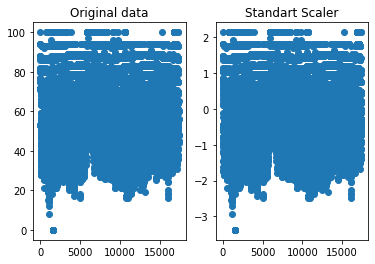

MEDIANA:
 count    1.737900e+04
mean     5.545110e-16
std      1.000029e+00
min     -3.449686e+00
25%     -6.602539e-01
50%     -2.697334e-01
75%      7.902508e-01
max      2.129178e+00
Name: hum, dtype: float64


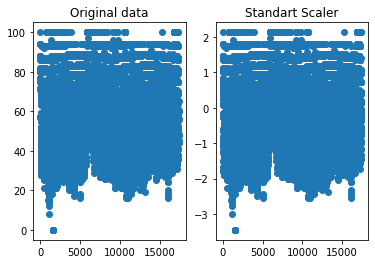

SASIEDZI:
 count    1.737900e+04
mean    -2.620657e-16
std      1.000029e+00
min     -3.162205e+00
25%     -7.879139e-01
50%     -1.368857e-02
75%      8.121517e-01
max      1.999297e+00
Name: hum, dtype: float64


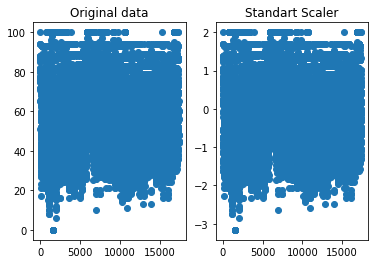

In [19]:
scaler = preprocessing.StandardScaler()
data_srednia_std_scaler = data_srednia.copy()
print("Wizualiacja Skalowania typu Standart dla parametru Wilgotnosci\n")

data_srednia_std_scaler[['temp', 'atemp', 'hum', 'windspeed']] =scaler.fit_transform(data_srednia_std_scaler[['temp', 'atemp', 'hum', 'windspeed']])
fig, axes = plt.subplots(1,2)
axes[0].scatter(range(len(data_srednia["hum"])), data_srednia["hum"])
axes[0].set_title("Original data")
axes[1].scatter(range(len(data_srednia_std_scaler["hum"])), data_srednia_std_scaler["hum"])
axes[1].set_title("Standart Scaler")
print("SREDNIA:\n", data_srednia_std_scaler["hum"].describe())
plt.show()

data_mediana_std_scaler = data_mediana.copy()
data_mediana_std_scaler[['temp', 'atemp', 'hum', 'windspeed']] =scaler.fit_transform(data_mediana_std_scaler[['temp', 'atemp', 'hum', 'windspeed']])
fig, axes = plt.subplots(1,2)
axes[0].scatter(range(len(data_mediana["hum"])), data_mediana["hum"])
axes[0].set_title("Original data")
axes[1].scatter(range(len(data_mediana_std_scaler["hum"])), data_mediana_std_scaler["hum"])
axes[1].set_title("Standart Scaler")
print("MEDIANA:\n", data_mediana_std_scaler["hum"].describe())
plt.show()

data_sasiedzi_std_scaler = data_sasiedzi.copy()
data_sasiedzi_std_scaler[['temp', 'atemp', 'hum', 'windspeed']] =scaler.fit_transform(data_sasiedzi_std_scaler[['temp', 'atemp', 'hum', 'windspeed']])
fig, axes = plt.subplots(1,2)
axes[0].scatter(range(len(data_sasiedzi["hum"])), data_sasiedzi["hum"])
axes[0].set_title("Original data")
axes[1].scatter(range(len(data_sasiedzi_std_scaler["hum"])), data_sasiedzi_std_scaler["hum"])
axes[1].set_title("Standart Scaler")
print("SASIEDZI:\n", data_sasiedzi_std_scaler["hum"].describe())
plt.show()

Wizualiacja Skalowania typu Standart dla parametru Temperatury

SREDNIA:
 count    1.737900e+04
mean     3.366380e-16
std      1.000029e+00
min     -2.477205e+00
25%     -8.153035e-01
50%      1.564696e-02
75%      8.465975e-01
max      2.612367e+00
Name: temp, dtype: float64


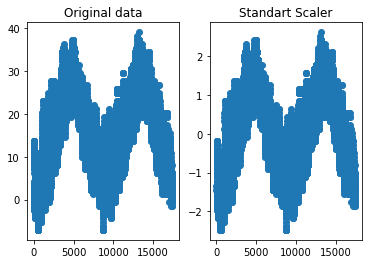

MEDIANA:
 count    1.737900e+04
mean     3.366380e-16
std      1.000029e+00
min     -2.477205e+00
25%     -8.153035e-01
50%      1.564696e-02
75%      8.465975e-01
max      2.612367e+00
Name: temp, dtype: float64


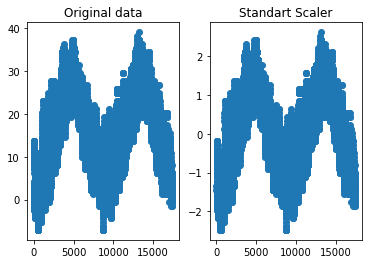

SASIEDZI:
 count    1.737900e+04
mean     3.366380e-16
std      1.000029e+00
min     -2.477205e+00
25%     -8.153035e-01
50%      1.564696e-02
75%      8.465975e-01
max      2.612367e+00
Name: temp, dtype: float64


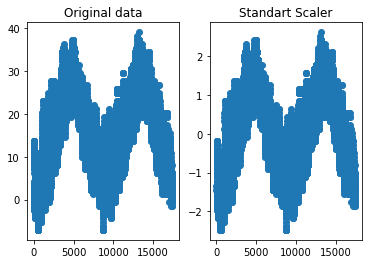

In [20]:
print("Wizualiacja Skalowania typu Standart dla parametru Temperatury\n")
fig, axes = plt.subplots(1,2)
axes[0].scatter(range(len(data_srednia["temp"])), data_srednia["temp"])
axes[0].set_title("Original data")
axes[1].scatter(range(len(data_srednia_std_scaler["temp"])), data_srednia_std_scaler["temp"])
axes[1].set_title("Standart Scaler")
print("SREDNIA:\n", data_srednia_std_scaler["temp"].describe())
plt.show()

fig, axes = plt.subplots(1,2)
axes[0].scatter(range(len(data_mediana["temp"])), data_mediana["temp"])
axes[0].set_title("Original data")
axes[1].scatter(range(len(data_mediana_std_scaler["temp"])), data_mediana_std_scaler["temp"])
axes[1].set_title("Standart Scaler")
print("MEDIANA:\n", data_mediana_std_scaler["temp"].describe())
plt.show()

fig, axes = plt.subplots(1,2)
axes[0].scatter(range(len(data_sasiedzi["temp"])), data_sasiedzi["temp"])
axes[0].set_title("Original data")
axes[1].scatter(range(len(data_sasiedzi_std_scaler["temp"])), data_sasiedzi_std_scaler["temp"])
axes[1].set_title("Standart Scaler")
print("SASIEDZI:\n", data_sasiedzi_std_scaler["temp"].describe())
plt.show()

In [ ]:
#zapis danych
data_sasiedzi_std_scaler.to_excel("NewData.xlsx")  